In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, Flatten, Dense, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
X_train=train_datagen.flow_from_directory("/content/drive/MyDrive/coal/",target_size=(128,128),class_mode='categorical',batch_size=5)

Found 253 images belonging to 5 classes.


In [11]:
X_test=test_datagen.flow_from_directory("/content/drive/MyDrive/coal/",target_size=(128,128),class_mode='categorical',batch_size=5)

Found 253 images belonging to 5 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [13]:
#initialising the model
model=Sequential()

In [14]:
#adding the cnn
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Convolution2D(32,(3,3),activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [20]:
#denser layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 300)               8

In [21]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=['accuracy'])

In [22]:
#training the model
model.fit(X_train, validation_data=X_test, epochs=20)

Epoch 1/20
51/51 [==============================] - 119s 2s/step - loss: 1.6354 - accuracy: 0.2688 - val_loss: 1.4619 - val_accuracy: 0.3281
Epoch 2/20
51/51 [==============================] - 31s 610ms/step - loss: 1.2793 - accuracy: 0.4783 - val_loss: 0.9140 - val_accuracy: 0.6403
Epoch 3/20
51/51 [==============================] - 28s 538ms/step - loss: 0.9766 - accuracy: 0.5889 - val_loss: 0.8915 - val_accuracy: 0.6798
Epoch 4/20
51/51 [==============================] - 28s 544ms/step - loss: 0.8746 - accuracy: 0.6680 - val_loss: 0.6743 - val_accuracy: 0.7470
Epoch 5/20
51/51 [==============================] - 24s 464ms/step - loss: 0.6988 - accuracy: 0.7273 - val_loss: 0.4556 - val_accuracy: 0.8300
Epoch 6/20
51/51 [==============================] - 27s 542ms/step - loss: 0.6381 - accuracy: 0.7628 - val_loss: 0.6741 - val_accuracy: 0.7312
Epoch 7/20
51/51 [==============================] - 24s 466ms/step - loss: 0.4082 - accuracy: 0.8577 - val_loss: 0.2704 - val_accuracy: 0.9209
E

In [23]:
#saving the model
model.save('coal.h5')

In [24]:
import numpy as np


In [52]:
#testing the model
from tensorflow.keras.preprocessing import image

In [53]:
from tensorflow.keras.models import load_model
model.load_weights('coal.h5')

In [147]:
img=image.load_img("/content/drive/MyDrive/coal/Anthracite/IMG_5997.jpg",target_size=(128,128))
x=image.img_to_array(img)
x.shape

(128, 128, 3)

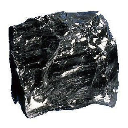

In [148]:
img

In [149]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [150]:
prediction=model.predict(x)
prediction

1/1 [==============================] - 0s 31ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [151]:
index=["Anthracite","Bituminous","Lignite","Not coal","Peat"]

In [152]:
result=str(index[prediction[0].tolist().index(1)])
result

'Anthracite'